In [1]:
import pysift
import numpy as np
import cv2
# import pysift

import logging

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# load img

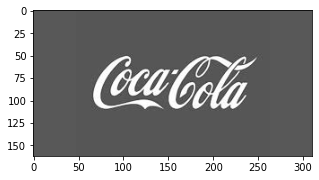

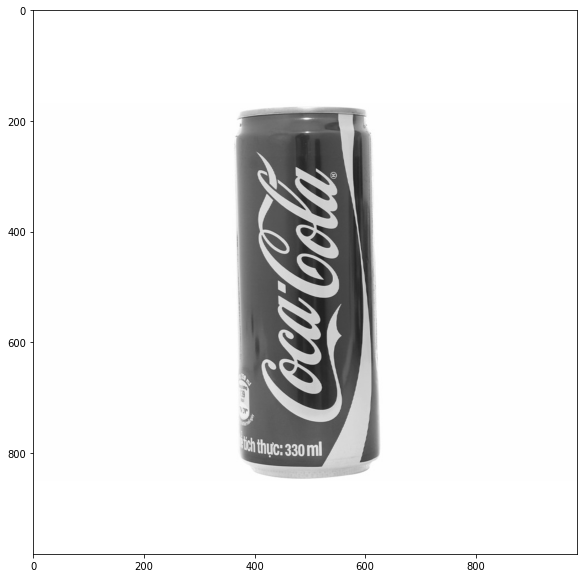

In [2]:
img1 = cv2.imread('coca2.jpg',0)
img2 = cv2.imread('coca1.jpg',0)
plt.figure(figsize=(5,5))
# plt.imshow(img1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.draw()

<xfeatures2d_SIFT 0x7f08890ae0b0>
des1:  81
des2:  435
matches:  81
good:  41


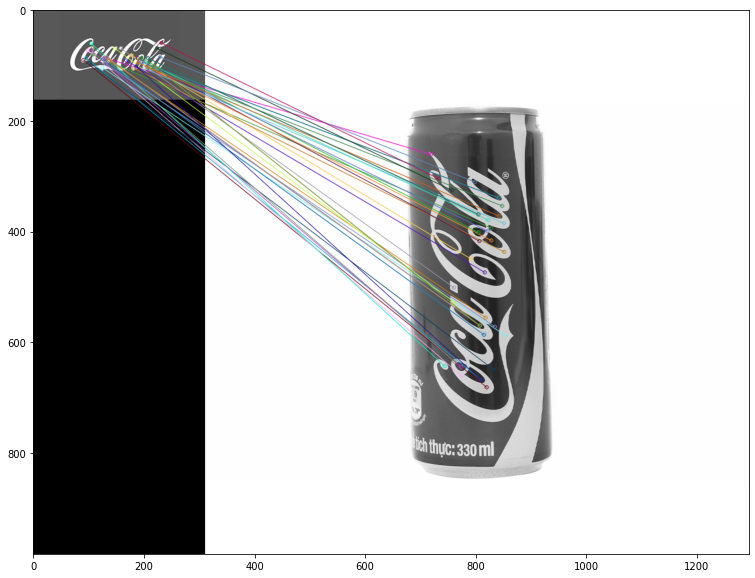

In [13]:
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 0, 
                                   nOctaveLayers = 3,
                                   contrastThreshold = 0.04,
                                   edgeThreshold = 10,
                                   sigma = 1.6)
print(sift)

# Compute SIFT keypoints and descriptors
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
print('des1: ', len(des1))
print('des2: ', len(des2))

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
print('matches: ', len(matches))

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
print('good: ', len(good))

# cv.drawMatchesKnn expects list of lists as matches
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# cv.imwrite('sift_keypoints.jpg',img3)

plt.figure(figsize=(20,10))
plt.imshow(img3)
plt.show()

In [18]:
sift.__dict__

AttributeError: 'cv2.xfeatures2d_SIFT' object has no attribute '__dict__'

In [17]:
from pprint import pprint
pprint(vars(sift))

TypeError: vars() argument must have __dict__ attribute

In [20]:
cv2.createInitialImage()

AttributeError: module 'cv2.cv2' has no attribute 'createInitialImage'